# Problem Statement
Creation of Intelligent Regression based data model to predict house / home prices on basis of sales data in Seattle region from 2014 to 2015. Data models take into account various features like area, location, amenities and condition.   

In [61]:
# importing all required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

### Reading the CSV file into pandas dataframe

In [62]:
#importing dataset
df = pd.read_csv("innercity.csv")  
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21613 rows and 23 columns


In [63]:
#Checking how data looks like
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [64]:
#Checking the size and shape of the dataset
print(df.shape)
print(df.size)

(21613, 23)
497099


### Data structure

In [65]:
#checking dimension of given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

### Data Summary and Data cleansing

In [66]:
#Columns of the given data set
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

### Feature Extraction

In [67]:
df["sold_year"] = df["dayhours"].apply(lambda x:x.split('T')[0][:4])

In [68]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015


In [69]:
df['sold_year'] = pd.to_numeric(df['sold_year'])

In [70]:
df['sold_year'].unique()

array([2014, 2015])

In [71]:
def age(born):
    today = date.today()
    return today.year - born

In [72]:
df['Age'] = df['sold_year'].apply(age)

In [73]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,Age
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,8
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,8
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,7
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,8
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,7


#### Remove unwanted columns

In [74]:
newData = df.drop(['cid','dayhours','sold_year'],axis=1)

In [75]:
#checking null values
newData.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
Age                 0
dtype: int64

In [76]:
#checking n/a values
newData.isna().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
Age                 0
dtype: int64

In [77]:
#checking duplicated rows
df.duplicated().sum()

0

<font color=darkblue>
    
- There are no null/empty values and also no duplicated data in the given dataset.

In [78]:
# statistical summary of the dataset using the describe() function
newData.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
room_bed,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
room_bath,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
living_measure,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
lot_measure,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
ceil,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
coast,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
sight,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
quality,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


#### UNI VARIANT ANALYSIS

In [79]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [80]:
#plotPerColumnDistribution(newData,5,5)

<AxesSubplot:>

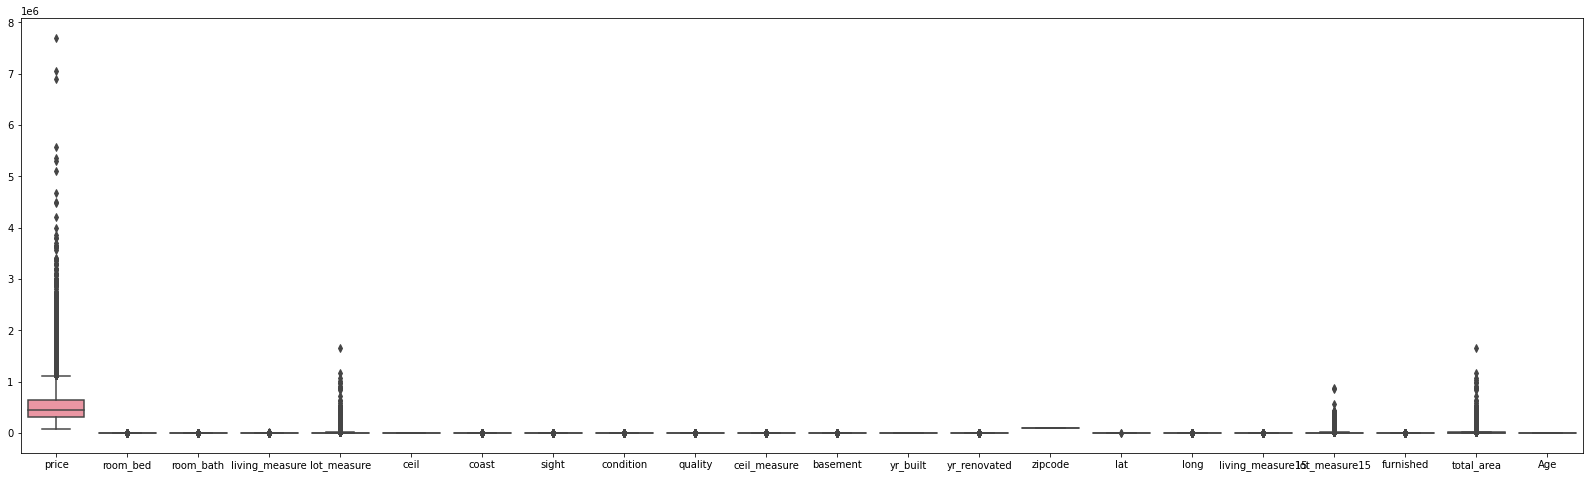

In [81]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=newData)

#### Bi Variant Analysis

In [82]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

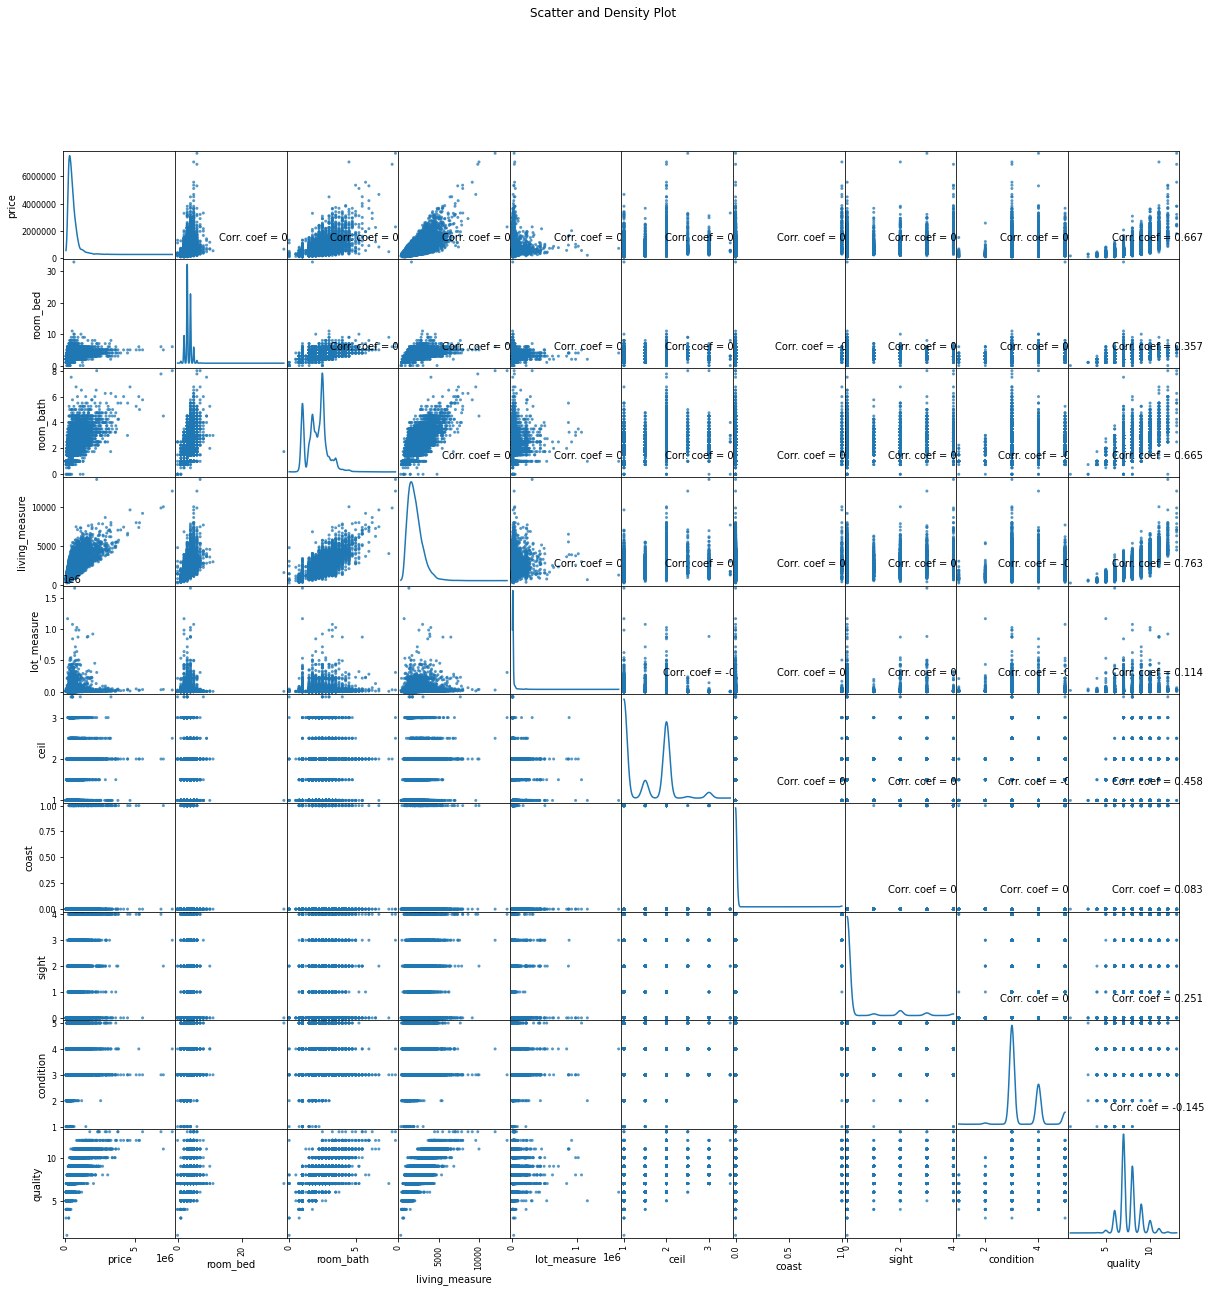

In [83]:
plotScatterMatrix(newData,20,10)

In [84]:
newData.corr()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,Age
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,...,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.565991,0.104796,-0.003554
room_bed,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.259268,0.044310,0.009838
room_bath,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,...,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.484923,0.104050,0.026596
living_measure,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.632947,0.194209,0.029038
lot_measure,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,...,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.118883,0.999763,-0.005468
ceil,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,...,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.347749,0.002637,0.022315
coast,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,...,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.069882,0.023809,0.004165
sight,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,...,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220250,0.080693,-0.001364
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,...,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.121902,-0.010219,0.045589
quality,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,...,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.788621,0.130004,0.030387


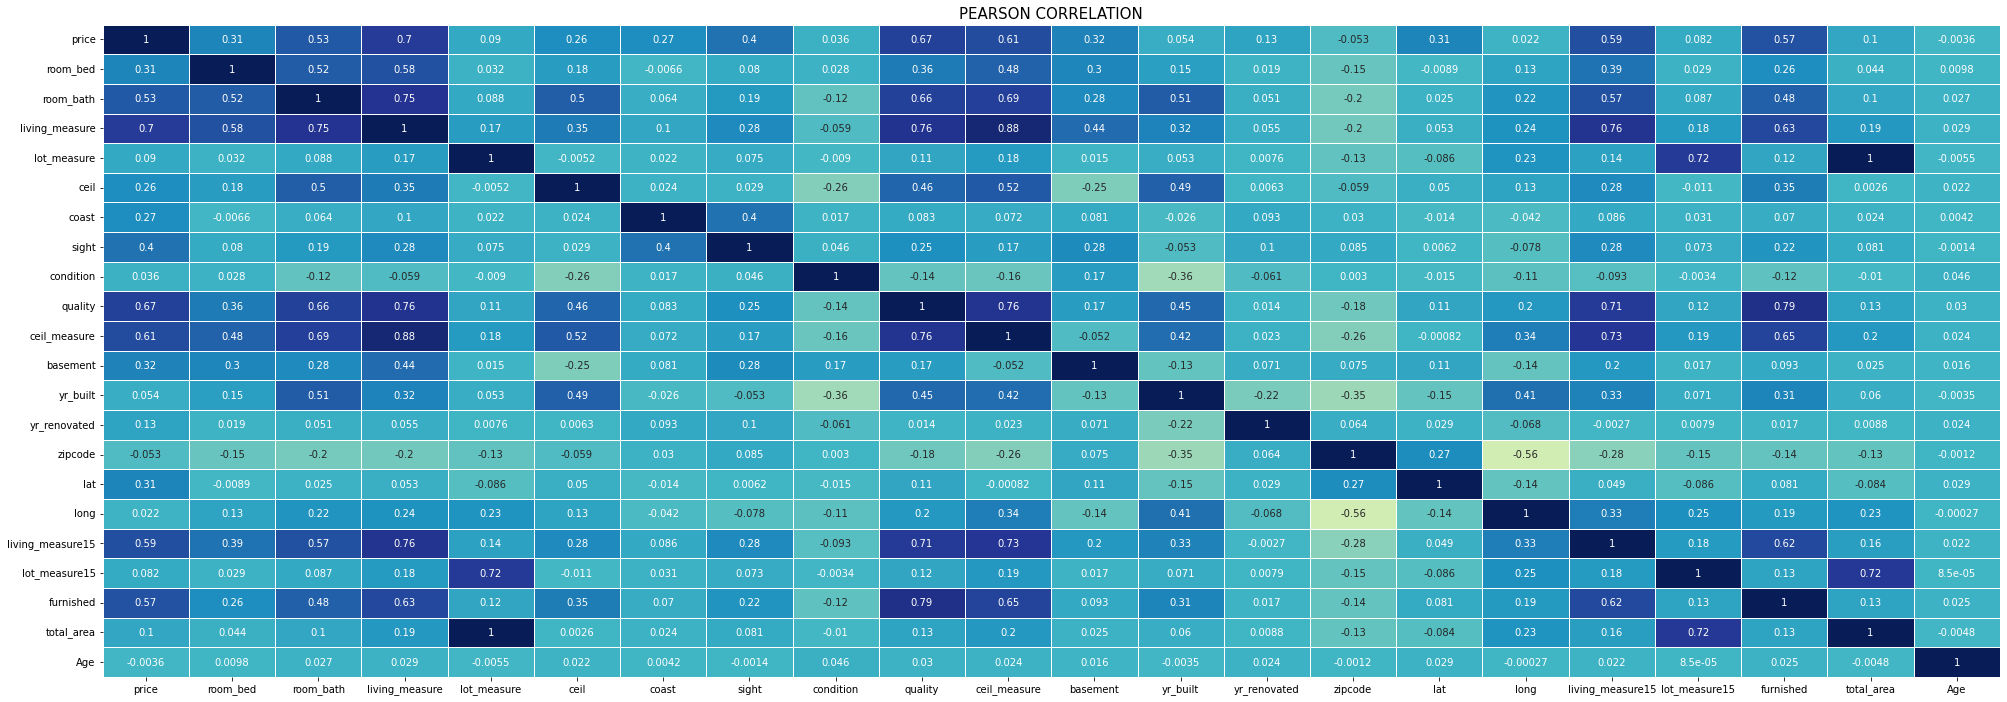

In [85]:
fig_dims = (34, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(newData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",ax=ax)
plt.title('PEARSON CORRELATION', fontsize=15)
plt.show()

<font color=darkblue>
    
- Some variables are associated linearly.

- Saome Variables are not much associated linearly.

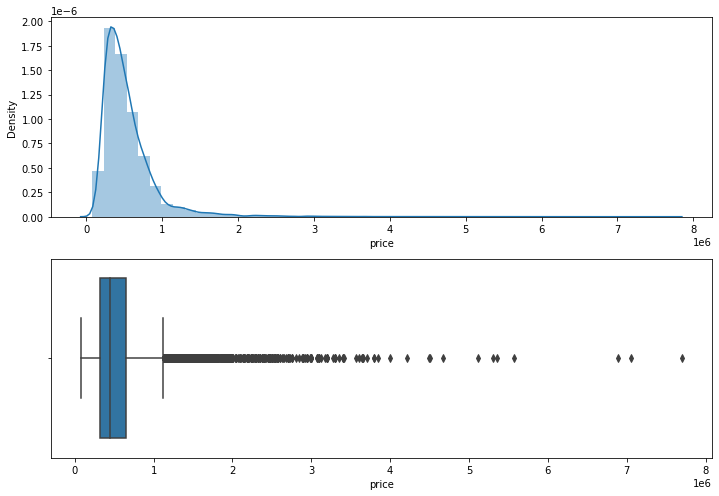

In [86]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(newData['price'])
fig.add_subplot(2,1,2)
sns.boxplot(newData['price'])
plt.tight_layout()

<font color=darkblue>
    
-With distribution plot of price, we can visualize that most of the prices are between 0 and around 1M with few outliers close to 8 million (might be luxury houses). It would make sense to drop those outliers in our analysis.

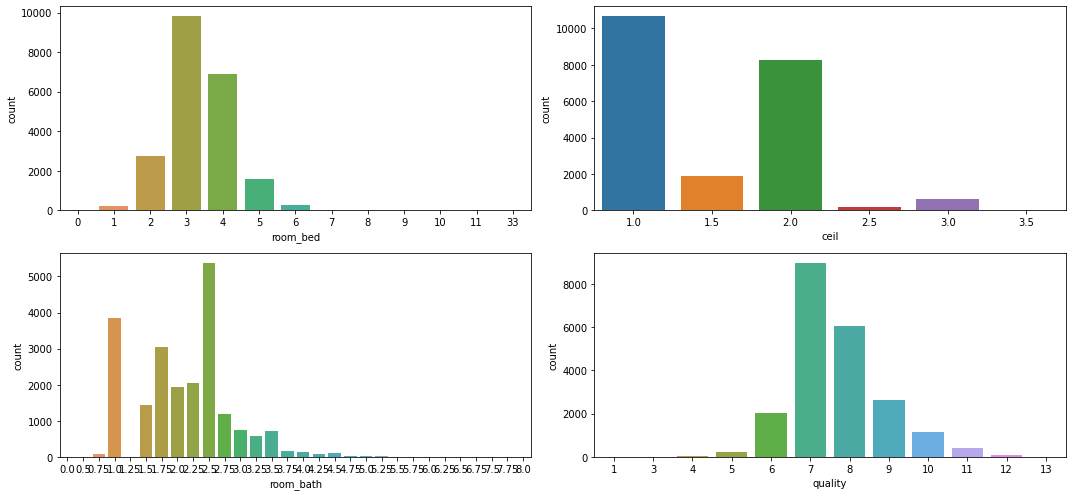

In [87]:
#visualizing bedrooms,bathrooms,floors,quality
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(newData['room_bed'])
fig.add_subplot(2,2,2)
sns.countplot(newData['ceil'])
fig.add_subplot(2,2,3)
sns.countplot(newData['room_bath'])
fig.add_subplot(2,2,4)
sns.countplot(newData['quality'])
plt.tight_layout()

<font color=darkblue>
    
- Most of the houses having 3 bedroom, 1 floor, 2 bathrooms and good quality houses

## Dataset Preparation (Splitting and Scaling)

In [88]:
#Separating Target and Independent variables
X = newData.drop('price',axis =1)
y = newData['price']

In [89]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area', 'Age'],
      dtype='object')

#### Feature scaling will give all features eaual priority to predict price.

In [90]:
#Scaling the features
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

In [91]:
#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.33, random_state=42)

In [92]:
# Make our model performs better with unseen data. Let's do cross validation(split data into train,validation and test)
# and measure the model performance range.
folds   = 10
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}".format(model_name, round(results.std(), 3)))

Linear: 2284.325
Lasso: 2308.369
Ridge: 2308.582
DecisionTree: 3436.205
KNN: 2328.225
RandomForest: 2256.455
AdaBoost: 15243.358
GradientBoost: 2038.067


In [93]:
def get_score(model, features,targets,cv):
    scores = cross_val_score(model, features, targets, cv= cv)
    return scores

In [94]:
# 10-fold cross validation for each model
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds)
    score = get_score(model, XScaled, y.values.ravel(), cv= k_fold)
    print("{}: {}".format(model_name, score))

Linear: [0.70901629 0.704106   0.71052159 0.70089092 0.71330256 0.71904199
 0.69234136 0.67975769 0.68593888 0.68764162]
Lasso: [0.70918386 0.7041085  0.71052229 0.70089018 0.71324004 0.71904266
 0.69234034 0.67981627 0.68593711 0.68764228]
Ridge: [0.70918413 0.70411128 0.71051775 0.70089171 0.71324148 0.71904317
 0.69234692 0.679817   0.68593715 0.68763799]
DecisionTree: [0.74222859 0.760801   0.7761537  0.77033036 0.74087352 0.7523087
 0.72385252 0.72965334 0.75233232 0.76646107]
KNN: [0.79491184 0.79226242 0.80625792 0.80046146 0.78725472 0.76871616
 0.79109788 0.77449576 0.73422454 0.79478508]
RandomForest: [0.87754405 0.90077397 0.87609412 0.88771465 0.88136126 0.8997869
 0.87059661 0.88062431 0.87695416 0.86621174]
AdaBoost: [ 0.2470717   0.0727567   0.22863127  0.20605094  0.18371913  0.04249775
 -0.1054935   0.23741759  0.15373488  0.11772176]
GradientBoost: [0.88127461 0.87543666 0.86718144 0.86977931 0.86923562 0.87479519
 0.85641273 0.86752528 0.87712789 0.85012273]


### Based on above scores we see that Gradiet Boosting Regressor gives best result for each fold and there is no much variation in each fold score. Hence taking Gradient Boosting Regressor as the best model for this problem.

#### Based on the above comparison, we can see that Gradient Boosting Regression model outperforms all the other regression models. So, we will choose it as the best Regression Model for this problem.

## Feature Importance

In [95]:
#PCA with actual independent variables
pca = PCA(n_components=21)
pca.fit(XScaled)

PCA(n_components=21)

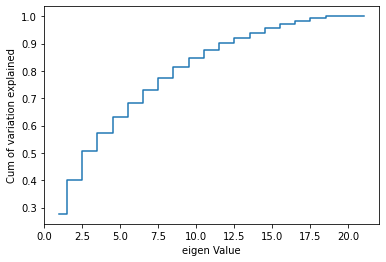

In [96]:
plt.step(list(range(1,22)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Now 14 dimensions seems very reasonable. With 14 variables we can explain over 95% of the variation in the original data!

In [97]:
pca3 = PCA(n_components=14)
pca3.fit(XScaled)
Xpca3 = pca3.transform(XScaled)
#splitting Train and Test 
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(Xpca3, y, test_size=0.33, random_state=42)

In [98]:
regression_model = GradientBoostingRegressor()
regression_model.fit(X_train, y_train)
print("Train Score",regression_model.score(X_train, y_train))
print("Test score",regression_model.score(X_test, y_test))

Train Score 0.9030591934967049
Test score 0.8707316186329294


In [99]:
regression_model_pca = GradientBoostingRegressor()
regression_model_pca.fit(X_PCA_train, y_PCA_train)
regression_model_pca.score(X_PCA_test, y_PCA_test)
print("Train Score",regression_model_pca.score(X_PCA_train, y_PCA_train))
print("Test score",regression_model_pca.score(X_PCA_test, y_PCA_test))

Train Score 0.8343232734550419
Test score 0.7831518996283183


Looks like by reducing dimensionality by 7, we only dropped around 7% in accuracy.

Text(0.5, 1.0, 'Feature Importance')

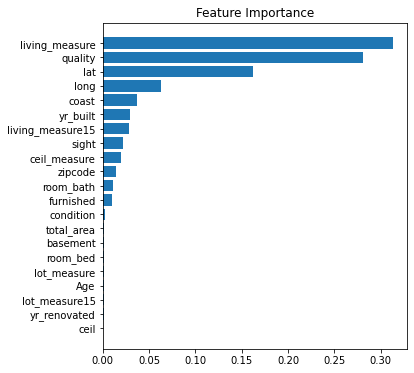

In [100]:
feature_importance = regression_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")

Text(0.5, 1.0, 'Feature Importance')

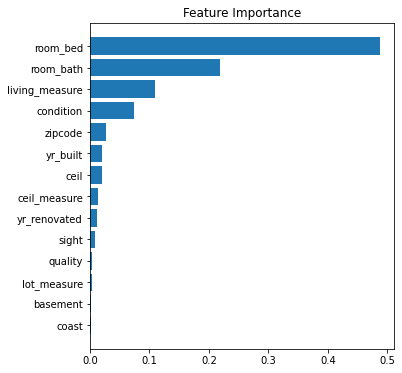

In [101]:
feature_importance = regression_model_pca.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")

In [108]:
pipe_gbr = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('gbr', GradientBoostingRegressor())]) 

param_grid = {'pca__n_components':[18],'gbr__max_depth': np.arange(5, 9, 1), 'gbr__learning_rate': [0.1, 0.01], 'gbr__n_estimators':[100,200]} 

grid_gbr = GridSearchCV( pipe_gbr , param_grid = param_grid, cv = 5) 

grid_gbr.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_gbr.predict(X_test))
print({
    'model': 'GBR',
    "Best accuracy":"{:.0%}".format(grid_gbr.best_score_),
    'Best Params': grid_gbr.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_gbr.score(X_test,y_test))
})

{'model': 'GBR', 'Best accuracy': '79%', 'Best Params': {'gbr__learning_rate': 0.1, 'gbr__max_depth': 6, 'gbr__n_estimators': 200, 'pca__n_components': 18}, 'Test set accuracy': '80%'}


In [109]:
pipe_gbr2 = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('gbr', GradientBoostingRegressor())]) 

param_grid2 = {'pca__n_components':[21],'gbr__max_depth': np.arange(5, 9, 1), 'gbr__learning_rate': [0.1, 0.01], 'gbr__n_estimators':[100,200]} 

grid_gbr2= GridSearchCV( pipe_gbr2 , param_grid = param_grid2, cv = 5) 

grid_gbr2.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_gbr2.predict(X_test))
print({
    'model': 'GBR',
    "Best accuracy":"{:.0%}".format(grid_gbr2.best_score_),
    'Best Params': grid_gbr2.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_gbr2.score(X_test,y_test))
})

{'model': 'GBR', 'Best accuracy': '79%', 'Best Params': {'gbr__learning_rate': 0.1, 'gbr__max_depth': 7, 'gbr__n_estimators': 200, 'pca__n_components': 21}, 'Test set accuracy': '81%'}


In [105]:
#pipe_gbr = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('gbr', GradientBoostingRegressor())]) 

#param_grid = {'pca__n_components':[14,15],'gbr__max_depth': np.arange(5, 9, 1), 'gbr__learning_rate': [0.1, 0.01], 'gbr__n_estimators':[100,200,300,400]} 

#grid_gbr = GridSearchCV( pipe_gbr , param_grid = param_grid, cv = 5) 

#grid_gbr.fit(X_train, y_train.values.ravel()) 
#y_pred = np.around(grid_gbr.predict(X_test))
#print({
#    'model': 'GBR',
#    "Best accuracy":"{:.0%}".format(grid_gbr.best_score_),
#    'Best Params': grid_gbr.best_params_,
#    'Test set accuracy': "{:.0%}".format(grid_gbr.score(X_test,y_test))
#})

In [110]:
model = GradientBoostingRegressor()
parameters = {"learning_rate": sp_randFloat(),
              "n_estimators" : sp_randInt(100, 1000),
              "max_depth"    : sp_randInt(4, 10)
             }
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                           cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
print("The best score:", randm.best_score_)
print("The best params:", randm.best_params_)
print('Test accuracy',"{:.0%}".format(randm.score(X_test,y_test)))

The best score: 0.8798619725725592
The best params: {'learning_rate': 0.11275308449654842, 'max_depth': 4, 'n_estimators': 699}
Test accuracy 90%
